# Alien Invasion in Pittsburg! 

Team Boolean Believers is on the quest to find the best neighborhood in Pittsburg to avoid an alien abduction and help YOU survive (because we care about you guys). By looking and analyzing data from three datasets, we will be able to determine the best neighborhood in Pittsburg to avoid an alien abduction. 


In [5]:
#All imports:
import pandas as pd
import numpy as np
import json
from descartes import PolygonPatch
from shapely.geometry import LineString
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas

## Metric 1: Playing Fields
As is common knowledge, alien abductions are most often facilitated by means of a "tractor beam" - a ray of light which, through inscrutable cosmic technologies, pulls any person, object, or bovine caught within its radius upwards into the UFO from which it emanates.

Through common sense, we can surmise that anyone with something above their heads, or at least some sturdy structure to grab, is safe from the first wave of the extraterrestrial threat. Conversely, anyone in an open area is more susceptible to abduction. First, let's plot these fields on a graph by latitude and longitude, compared to a map of the 'Burgh.

In [11]:
import pandas as pd
import csv
from descartes import PolygonPatch
from shapely.geometry import LineString
import matplotlib.pyplot
%matplotlib inline
import geopandas

In [12]:
playingFields = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23")
byLat = playingFields
del byLat["has_lights"], byLat["field_usage"], byLat["goal_post"], byLat["infield_type"], byLat["left_field_distance"], byLat["right_field_distance"]
del byLat["center_field_distance"], byLat["backstop"], byLat["council_district"], byLat["ward"], byLat["tract"], byLat["public_works_division"]
del byLat["pli_division"], byLat["police_zone"], byLat["fire_zone"]

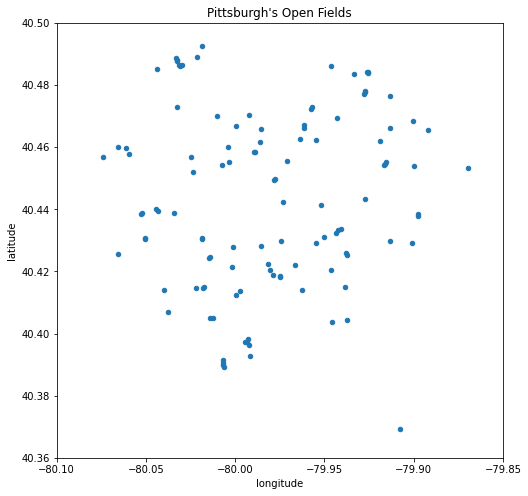

In [13]:
byLat.plot.scatter(figsize=(8,8),
                   x='longitude', 
                   y='latitude', 
                   title='Pittsburgh\'s Open Fields', 
                   xlim = (-80.10,-79.85), 
                   ylim = (40.36,40.50))

/opt/tljh/user/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x576 with 0 Axes>

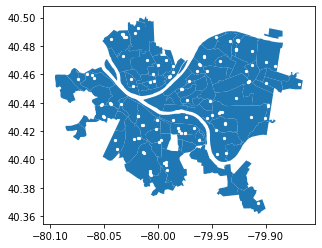

In [14]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods = neighborhoods.to_crs({'init':'EPSG:4326'})
chart = matplotlib.pyplot.figure(figsize=(8, 8)) 
axes = neighborhoods.plot()

x, y = playingFields['longitude'].values, playingFields['latitude'].values
axes.scatter(x,y, marker="o", color='w', zorder=10, s=5)
matplotlib.pyplot.show

In [15]:
neighborhoodCounters = dict()
counter = 0

for x in range(0, 114):
    hood = str(playingFields.at[counter,'neighborhood'])
    counter = counter+1

    if hood not in neighborhoodCounters:
        neighborhoodCounters[hood] = 1
        
    else:
        neighborhoodCounters[hood] = neighborhoodCounters[hood]+1
        
dict(sorted(neighborhoodCounters.items(), key=lambda item: item[1]))

{'Allentown': 1,
 'Windgap': 1,
 'Arlington': 1,
 'East Hills': 1,
 'East Liberty': 1,
 'Upper Lawrenceville': 1,
 'Fineview': 1,
 'Garfield': 1,
 'Perry South': 1,
 'Terrace Village': 1,
 'Larimer': 1,
 'Central Oakland': 1,
 'Lincoln Place': 1,
 'Spring Garden': 1,
 'Oakwood': 1,
 'Stanton Heights': 1,
 'Marshall-Shadeland': 1,
 'West End': 1,
 'Polish Hill': 1,
 'Squirrel Hill North': 1,
 'Homewood South': 1,
 'South Side Flats': 2,
 'Banksville': 2,
 'Lincoln-Lemington-Belmar': 2,
 'South Oakland': 2,
 'Crafton Heights': 2,
 'Regent Square': 2,
 'Perry North': 2,
 'Elliott': 2,
 'Central Lawrenceville': 2,
 'Bedford Dwellings': 2,
 'Greenfield': 2,
 'Manchester': 2,
 'Allegheny Center': 2,
 'Spring Hill-City View': 2,
 'Westwood': 2,
 'Troy Hill': 3,
 'Beechview': 3,
 'Morningside': 3,
 'Beltzhoover': 3,
 'Sheraden': 3,
 'Shadyside': 3,
 'Lower Lawrenceville': 4,
 'Hazelwood': 4,
 'Mount Washington': 4,
 'Highland Park': 4,
 'Squirrel Hill South': 5,
 'Carrick': 5,
 'South Side Slo

As we can conclusively see from this dictionary output, a series of neighborhoods are tied for lowest playing field count with only one playing field each, any of which would be a fine contender for best neighborhood. A decisive victor should emerge when weighed against the other factors.

Now to scale it for use with the other metrics:

In [16]:
for key in neighborhoodCounters:
    neighborhoodCounters[key] = (1-(neighborhoodCounters[key]/7))

dict(sorted(neighborhoodCounters.items(), key=lambda item: item[1]))

{'Brighton Heights': 0.0,
 'South Side Slopes': 0.1428571428571429,
 'Brookline': 0.1428571428571429,
 'Squirrel Hill South': 0.2857142857142857,
 'Carrick': 0.2857142857142857,
 'Lower Lawrenceville': 0.4285714285714286,
 'Hazelwood': 0.4285714285714286,
 'Mount Washington': 0.4285714285714286,
 'Highland Park': 0.4285714285714286,
 'Troy Hill': 0.5714285714285714,
 'Beechview': 0.5714285714285714,
 'Morningside': 0.5714285714285714,
 'Beltzhoover': 0.5714285714285714,
 'Sheraden': 0.5714285714285714,
 'Shadyside': 0.5714285714285714,
 'South Side Flats': 0.7142857142857143,
 'Banksville': 0.7142857142857143,
 'Lincoln-Lemington-Belmar': 0.7142857142857143,
 'South Oakland': 0.7142857142857143,
 'Crafton Heights': 0.7142857142857143,
 'Regent Square': 0.7142857142857143,
 'Perry North': 0.7142857142857143,
 'Elliott': 0.7142857142857143,
 'Central Lawrenceville': 0.7142857142857143,
 'Bedford Dwellings': 0.7142857142857143,
 'Greenfield': 0.7142857142857143,
 'Manchester': 0.714285714

## Metric 2: Healthy Ride Station Avaliability

In this section, we are going to look at the Healthy Ride Stations dataset and observe which neighborhood is the best to be in during an alien abduction. Obviously, you want to have the most readily avaliable access to bikes to bike away from tractor beams as opposed to your friends who are going to be escaping by running (so inefficient am I right?). Also, cars are not a good option because they make you a more attractive target.

![bike](https://media.giphy.com/media/jTx79AE82MwDzq6WkL/giphy.gif)

In [3]:
# load the data from csv file
healthy_ride_data = pd.read_csv("healthy_ride.csv") 
 
# load first 5 rows to identify what data we are working with 
healthy_ride_data.head()

,Station #,Station Name,# of Racks,Latitude,Longitude
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080
2,1002,Third Ave & Wood St,15,40.439030,-80.001860
3,1003,First Ave & Smithfield St,9,40.437200,-80.000375
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102


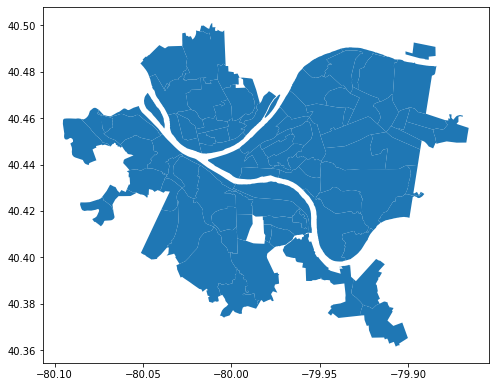

In [4]:
# plots the neighborhoods and their boundaries in Pittsburg
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot(figsize = (8,8)) # plot the geopandas dataframe

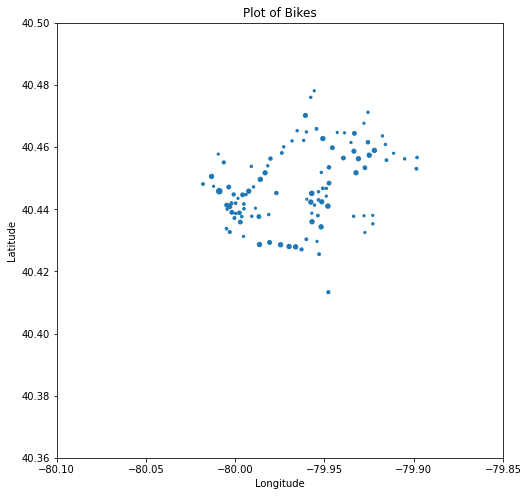

In [5]:
# creates the scatter plot of where there are healthy ride stations using their longitude and latitude 
# as x & y, uses the # of racks to determine the size of each point, and setting the x and y limits to 
# see the data relative to the neighborhood chart previously plotted
healthy_ride_data.plot.scatter(x='Longitude', 
                               y='Latitude', 
                               figsize = (8,8),
                               s=healthy_ride_data["# of Racks"],
                               xlim = (-80.10,-79.85),
                               ylim = (40.36,40.50),
                               title= "Plot of Bikes")

/opt/tljh/user/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x576 with 0 Axes>

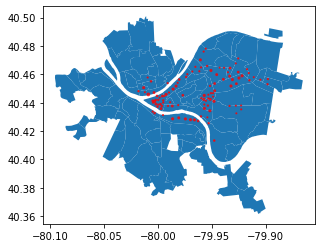

In [6]:
# transform the neighborhood geometry to a new coordinate reference system
neighborhoods = neighborhoods.to_crs({'init': 'epsg:4326'})

fig = plt.figure(figsize=(8, 8)) 
ax = neighborhoods.plot()

# gets x and y coordinates from the datset 
x, y = healthy_ride_data['Longitude'].values, healthy_ride_data['Latitude'].values
ax.scatter(x,y, marker="*", color='r', alpha=0.7, zorder=5, s=2)
plt.show

In [78]:
#get a list of coordinate points (lat/long)
gdf = geopandas.GeoDataFrame(healthy_ride_data, geometry=geopandas.points_from_xy(healthy_ride_data.Longitude, healthy_ride_data.Latitude))
g = gdf['geometry'] 
#use .contains to create a boolean array (True for each point in the shape)
booleans = pd.concat([neighborhoods.contains(point) for point in g], axis=1)
#convert that boolean array into a list containting the count for each neighborhood
counts = []
for index, row in booleans.iterrows():
    b = row.tolist()
    count = sum(b)
    counts.append(count)

In [79]:
#create final dataframe with neighborhood and station counts
final = pd.read_csv("Neighborhoods.csv")
final = final[["objectid", "hood"]] #use csv file to get neighborhood names
final.rename(columns={'objectid': 'ID', 'hood': 'Neighborhood'}, inplace=True)
#add counts to dataframe
final["Number of HealthyRide Stations"] = counts
#sort and output dataframe
sort = final.sort_values(by=["Number of HealthyRide Stations"], ascending = False)
sort.head()

,ID,Neighborhood,Number of HealthyRide Stations
41,1334,Central Business District,18
37,1330,North Oakland,9
40,1333,Strip District,8
61,1354,South Side Flats,7
31,1324,Shadyside,7


Cool! Now we have an overlap of the station points and neighborhood plot

#### Map of Pittsburg and its Neighborhoods

![Pittsburgh Map](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Pittsburgh_Pennsylvania_neighborhoods_fade.svg/500px-Pittsburgh_Pennsylvania_neighborhoods_fade.svg.png)


### Interpreting the Data
Wow, there only seems to be stations located in the downtown, east end-south, and east end-north. I guess if you are anywhere else, you'd have to run away or hide. The best neighborhoods in terms of accessability to healthy ride stations and total number of bikes are the Central Business District, the Oaklands, Strip District, Southside Flats, and Shadyside (in that order). So, if there's anything that we learned, its that if you can ride a bike and are located around campus or the downtown, then you can probably get to a bike and escape an alien abduction. 

## Metric 3: Wooded Area


In this section, we look at what percentage area in the neighborhood is heavily forested. Wooded area is important as it provides cover to avoid the tractor beam - you are less likely to be abducted from the woods than an open field, where the aliens can easily find you. 

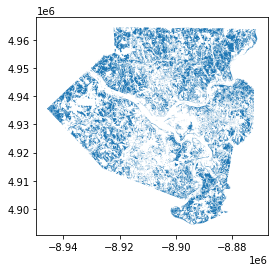

In [6]:
#Plot wooded areas:
woods_shape = geopandas.read_file("Wooded_Areas.shp") # read in the shapefile
woods_shape.plot() # plot the geopandas dataframe

Here is the shape map of wooded areas from "Allegheny County Wooded Area Boundaries", which identifes stands of trees too numerous to plot as individual trees and s accessible [here](https://data.wprdc.org/dataset/allegheny-county-wooded-area-boundaries1). By finding intersections with the shape map of Pittsburgh neighborhoods (accessible [here](https://data.wprdc.org/dataset/neighborhoods2)) we can get the percentage wooded area for each neighborhood.

In [2]:
#Run Wooded-Area.ipynb first to recover stored variable
%store -r n
#sort and output dataframe
sort = n.sort_values(by=["Percentage Wooded"], ascending=False)
sort.head()

,ID,Neighborhood,Percentage Wooded
18,1311,Hays,71
59,1352,Glen Hazel,64
20,1313,New Homestead,61
68,1361,St. Clair,49
71,1364,Arlington Heights,41


We can also plot the data as a heatmap:

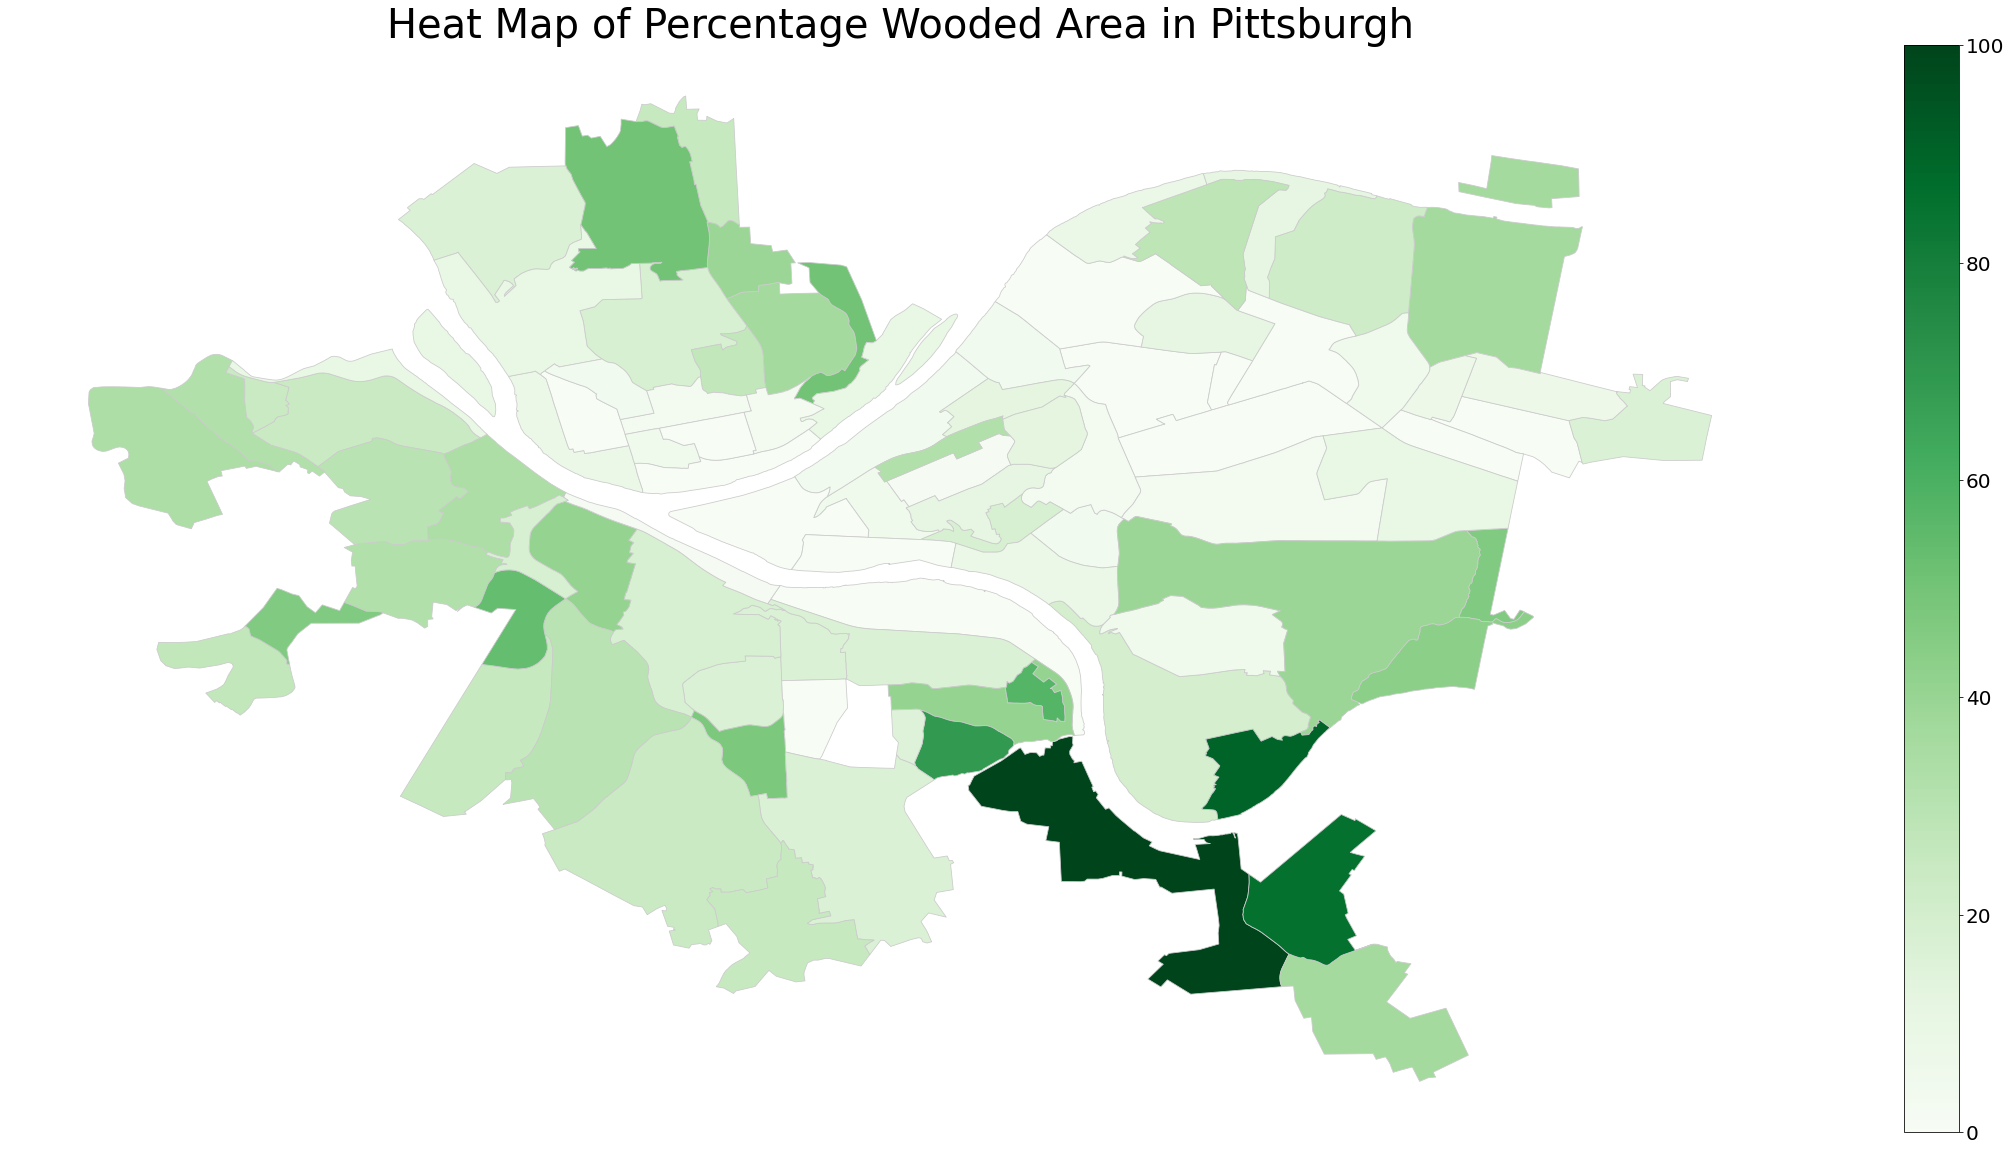

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
neighborhoods["Wooded"] = n['Percentage Wooded']
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Percentage Wooded Area in Pittsburgh', fontdict={'fontsize': '40', 'fontweight' : '3'})
#create color bar
color = 'Greens'
vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
#plot
neighborhoods.plot('Wooded', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

As you can see, Hays, Glen Hazel and New Homestead are the most densly wooded neighborhoods, with 71%, 64%, and 61% respectively.

# Combined Metric: Alien Abduction Avoidance (AAA)
After analyzing and creating a metric for each respective dataset, we are now going to combine these metrics into one to determine which neighborhood stands above all others during an alien abduction. We decided to scale each metric on a scale of 0 to 1, with 1 being the best and 0 the worst. 

### And for the long awaited winner ... we'd like to congratulate *SOUTH OAKLAND* as the best neighborhood to be in during an alien abduction! 
After looking through each metric, it has come to our attention that South Oakland's close proximity to the wooded areas of Squirrel Hill South and Glen Hazel, its readily abundant supply of healthy ride station bikes, and general lack of playing fields makes it the most optimal neighborhood to escape from those pesky aliens. The good news is that we Pitt students are located right next to South Oakland, the bad news ... is that there will be A LOT of competition from fellow students for those bikes. But hey, the more people there are around you, the less likely you will be the one lifted up 
